In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


In [3]:
dir = 'Desktop/captured_images'
train_dir = os.path.join(dir, 'train')
validation_dir = os.path.join(dir, 'validation')
# train_cats_dir = os.path.join(train_dir, 'cats')
# train_dogs_dir = os.path.join(train_dir, 'dogs')
# validation_cats_dir = os.path.join(validation_dir, 'cats')
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')
vgg = VGG16(input_shape=[224, 224] + [3], weights='imagenet', include_top=False)
for layers in vgg.layers:
    layers.trainable=False
# folders = glob('Desktop/captured_images/train/*')
x = Flatten()(vgg.output)
prediction = Dense(4, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 321 images belonging to 4 classes.


In [7]:
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 80 images belonging to 4 classes.


In [8]:
history = model.fit_generator(
  train_generator,
  validation_data=validation_generator,
  epochs=5,
  steps_per_epoch=32,
  validation_steps=32)

Epoch 1/5
32/32 [==============================] - 498s 16s/step - loss: 0.4266 - acc: 0.8614 - val_loss: 0.0044 - val_acc: 1.0000
Epoch 2/5
32/32 [==============================] - 473s 15s/step - loss: 0.0057 - acc: 1.0000 - val_loss: 0.0161 - val_acc: 1.0000
Epoch 3/5
32/32 [==============================] - 481s 15s/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 4/5
32/32 [==============================] - 499s 16s/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0159 - val_acc: 1.0000
Epoch 5/5
32/32 [==============================] - 518s 16s/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0091 - val_acc: 1.0000


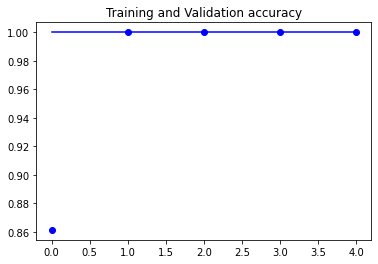

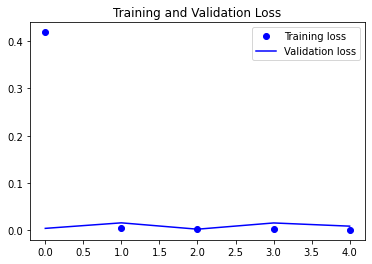

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')

plt.legend()

plt.show()

In [10]:
model.save('facefeatures_model.h5')